# EDA & Visualization ----> Twitter Data Analysis

# Twitter Sentiment Analysis

This notebook performs sentiment analysis on a dataset of tweets. It covers data loading, preprocessing, visualization, and model training.

## Import Libraries

First, we import the necessary libraries for data manipulation, visualization, and machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob
from wordcloud import WordCloud

## Load the Data

Load the dataset containing tweets and their corresponding sentiment scores.


In [3]:
df=pd.read_csv("D:/THARUN/PROJECTS/Twitter Sentiment Analysis/twitter_dataset.csv")

In [4]:
df.shape

(10000, 6)

In [5]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [7]:
df.describe()

,Tweet_ID,Retweets,Likes
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300
std,2886.89568,28.948856,28.877193
min,1.00000,0.000000,0.000000
25%,2500.75000,25.000000,25.000000
50%,5000.50000,49.000000,50.000000
75%,7500.25000,75.000000,75.000000
max,10000.00000,100.000000,100.000000


## Data Preprocessing

We start by checking for missing values and basic statistics of the data.


In [8]:
df.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date

In [11]:
df['Month'] = df['Timestamp'].dt.month

In [12]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Date,Month
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,2023-01-30,1
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,2023-01-02,1
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,2023-01-18,1
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,2023-04-10,4
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,2023-01-24,1


In [13]:
df['Year'] = df['Timestamp'].dt.year

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month_Name'] = df['Timestamp'].dt.month_name()

In [15]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Date,Month,Year,Month_Name
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,2023-01-30,1,2023,January
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,2023-01-02,1,2023,January
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,2023-01-18,1,2023,January
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,2023-04-10,4,2023,April
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,2023-01-24,1,2023,January


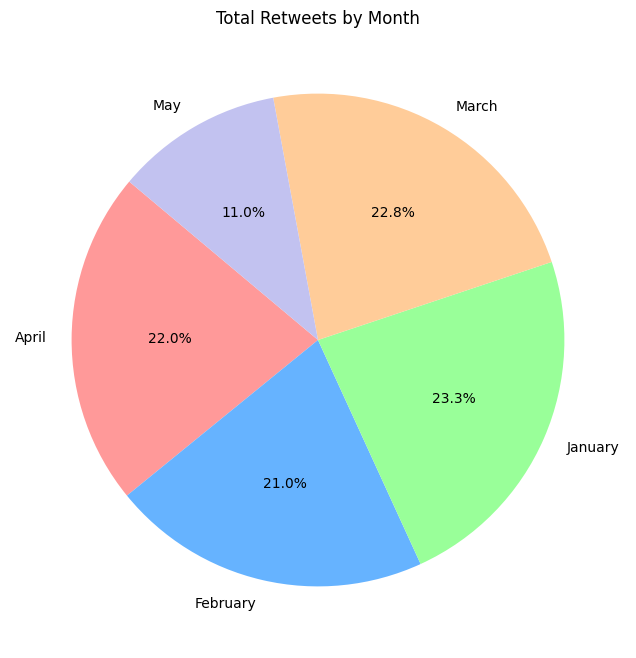

In [16]:
monthly_retweets_total = df.groupby('Month_Name')['Retweets'].sum()
colors = [
    '#ff9999','#66b3ff','#99ff99','#ffcc99',
    '#c2c2f0','#ffb3e6', '#c4e17f', '#f9d423',
    '#e2d810','#d9138a','#12a4d9','#322e2f'
]
# Plotting
plt.figure(figsize=(8, 8))  # Sets the figure size
plt.pie(monthly_retweets_total, labels=monthly_retweets_total.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Total Retweets by Month')
plt.show()

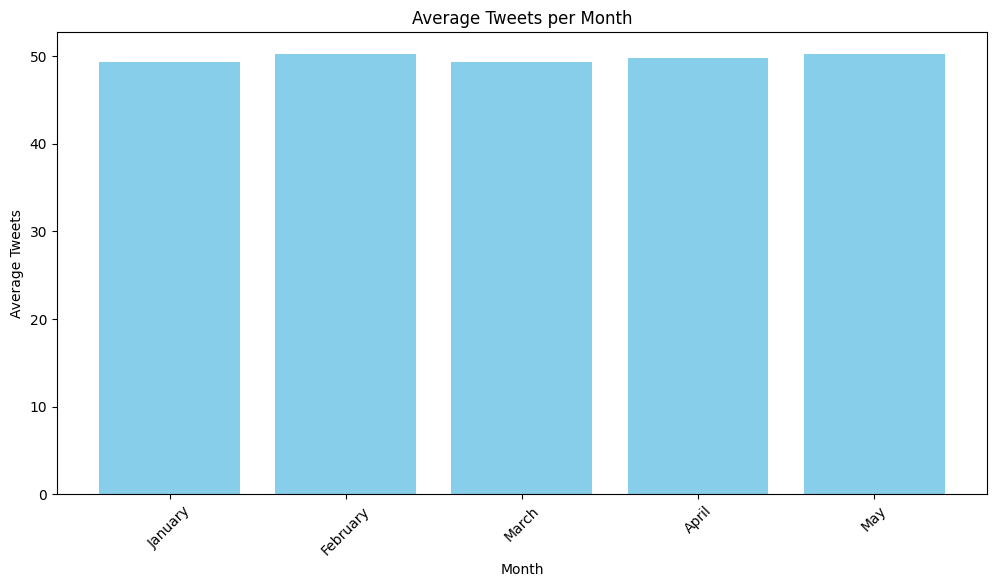

In [17]:
average_tweet_counts = df.groupby('Month_Name')['Retweets'].mean().reset_index()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_tweet_counts['Month_Name'] = pd.Categorical(average_tweet_counts['Month_Name'], categories=months_order, ordered=True)
average_tweet_counts = average_tweet_counts.sort_values('Month_Name')

plt.figure(figsize=(12, 6))
plt.bar(average_tweet_counts['Month_Name'], average_tweet_counts['Retweets'], color='skyblue')
plt.title('Average Tweets per Month')
plt.xlabel('Month')
plt.ylabel('Average Tweets')
plt.xticks(rotation=45)

plt.show()

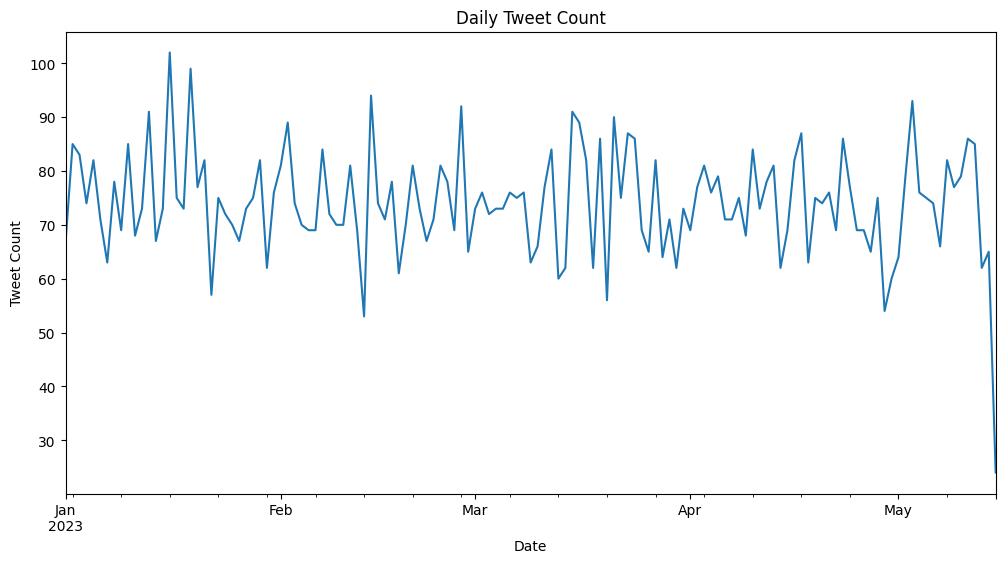

In [18]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df.set_index('Timestamp', inplace=True)
daily_tweet_count = df['Tweet_ID'].resample('D').count()
plt.figure(figsize=(12, 6))
daily_tweet_count.plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()

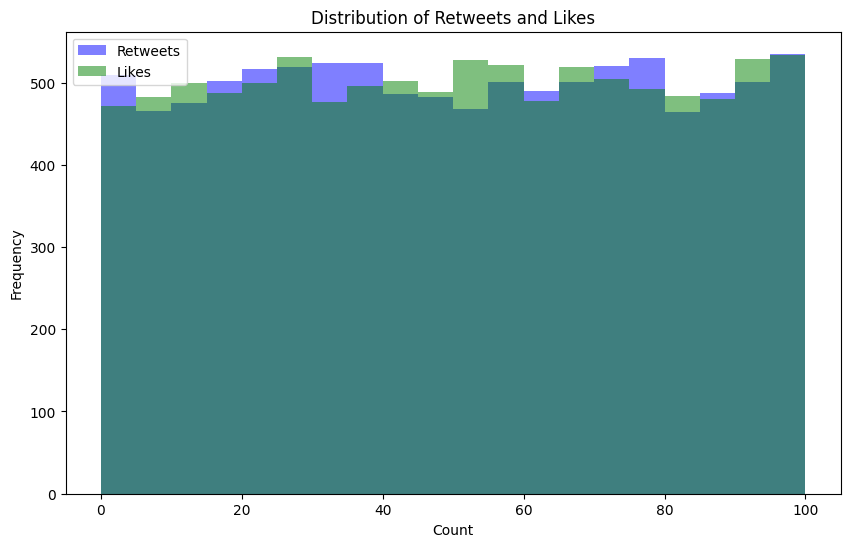

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Retweets'], bins=20, alpha=0.5, label='Retweets', color='blue')
plt.hist(df['Likes'], bins=20, alpha=0.5, label='Likes', color='green')

plt.title('Distribution of Retweets and Likes')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()

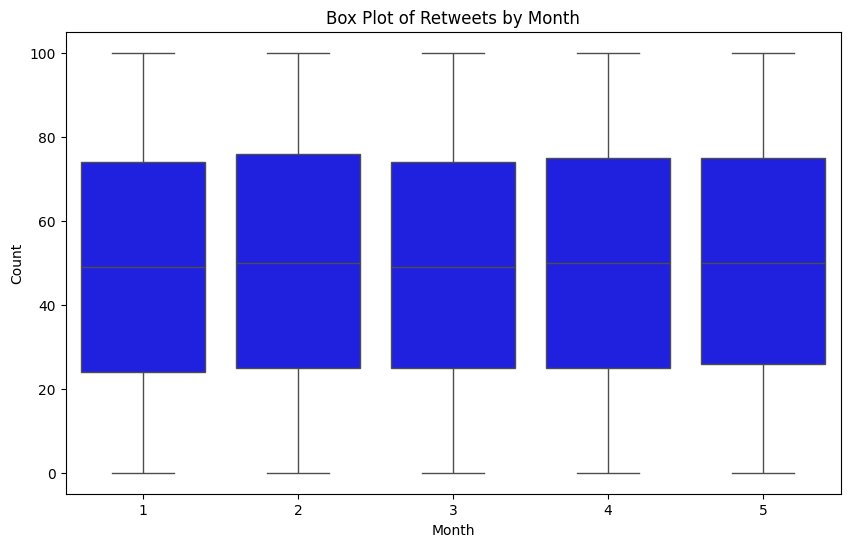

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Retweets', data=df, color='blue', showfliers=False)

plt.title('Box Plot of Retweets by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

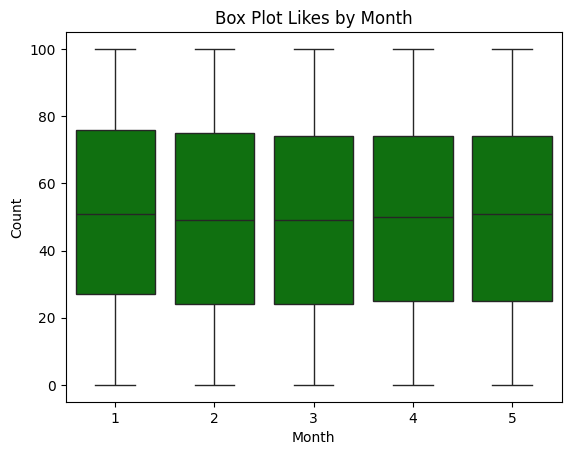

In [21]:
sns.boxplot(x='Month', y='Likes', data=df, color='green', showfliers=False)
plt.title('Box Plot Likes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [22]:
avg_retweets = df['Retweets'].mean()
avg_likes = df['Likes'].mean()
print("Average Retweets:", avg_retweets)
print("Average Likes:", avg_likes)

Average Retweets: 49.7212
Average Likes: 49.9293


In [23]:
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Dell\AppData\Local\Temp\ipykernel_10088\3565269673.py:1: SyntaxWarning: invalid escape sequence '\s'
  df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10088\3565269673.py:2: SyntaxWarning: invalid escape sequence '\S'
  df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming or Lemmatization
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


In [26]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Date,Month,Year,Month_Name,tokens
Timestamp,,,,,,,,,,
2023-01-30 11:00:51,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30,1,2023,January,"[parti, least, receiv, say, singl, ., prevent,..."
2023-01-02 22:45:58,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02,1,2023,January,"[hotel, still, congress, may, member, staff, ...."
2023-01-18 11:25:19,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18,1,2023,January,"[nice, debat, industri, year, ., film, gener, ..."
2023-04-10 22:06:29,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10,4,2023,April,"[laugh, explain, situat, career, occur, seriou..."
2023-01-24 07:12:21,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24,1,2023,January,"[involv, sens, former, often, approach, govern..."


In [27]:
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])

In [28]:
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [29]:
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034817


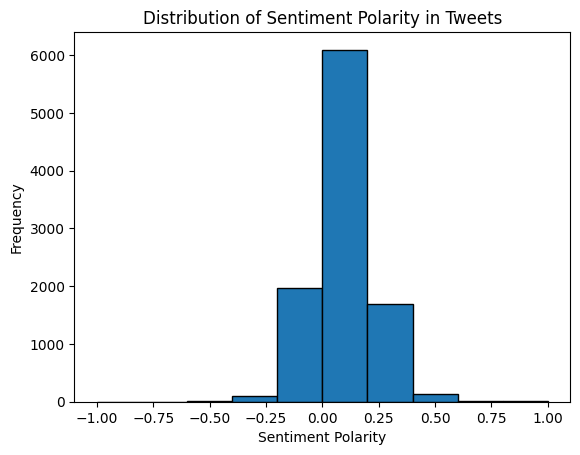

In [30]:
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()

In [31]:
top_users = df.groupby('Username')['Retweets'].sum().nlargest(10)
print("Top Users by Retweets:")
print(top_users)

Top Users by Retweets:
Username
pjohnson           362
awilliams          306
fsmith             301
wmitchell          269
nbrown             267
davidsmith         263
christopher64      261
amiller            253
ehernandez         251
jessicawilliams    251
Name: Retweets, dtype: int64


In [32]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Date,Month,Year,Month_Name,tokens,sentiment_polarity
Timestamp,,,,,,,,,,,
2023-01-30 11:00:51,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30,1,2023,January,"[parti, least, receiv, say, singl, ., prevent,...",0.115714
2023-01-02 22:45:58,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02,1,2023,January,"[hotel, still, congress, may, member, staff, ....",0.308333
2023-01-18 11:25:19,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18,1,2023,January,"[nice, debat, industri, year, ., film, gener, ...",0.220000
2023-04-10 22:06:29,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10,4,2023,April,"[laugh, explain, situat, career, occur, seriou...",0.054762
2023-01-24 07:12:21,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24,1,2023,January,"[involv, sens, former, often, approach, govern...",0.033333


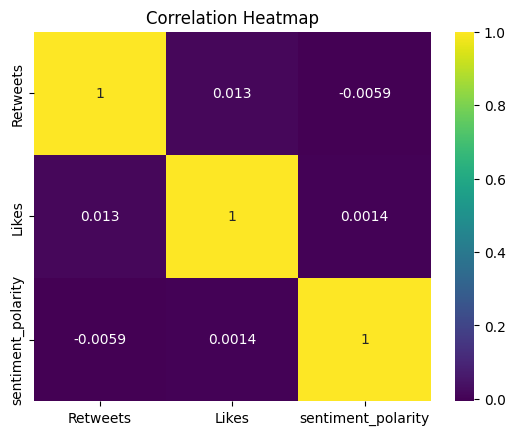

In [33]:
correlation_matrix = df[['Retweets', 'Likes', 'sentiment_polarity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

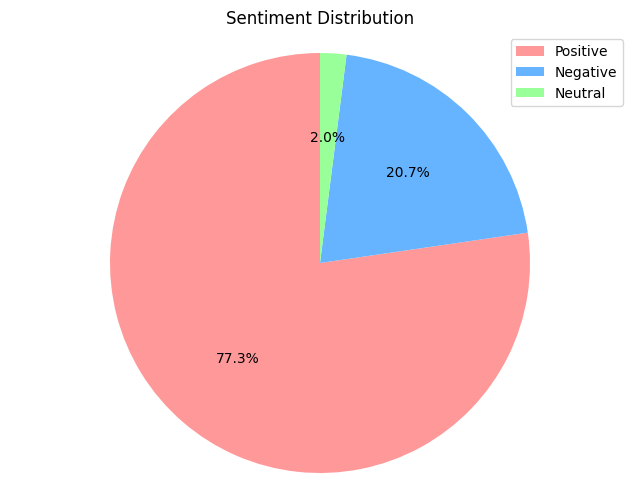

In [34]:
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
colors = [
    '#ff9999','#66b3ff','#99ff99','#ffcc99',
    '#c2c2f0','#ffb3e6', '#c4e17f', '#f9d423',
    '#e2d810','#d9138a','#12a4d9','#322e2f'
]
# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
sentiment_counts = df['Sentiment Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, autopct='%1.1f%%', startangle=90, colors = colors)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.legend(sentiment_counts.index, loc="upper right")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10088\4151333057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette=colors)


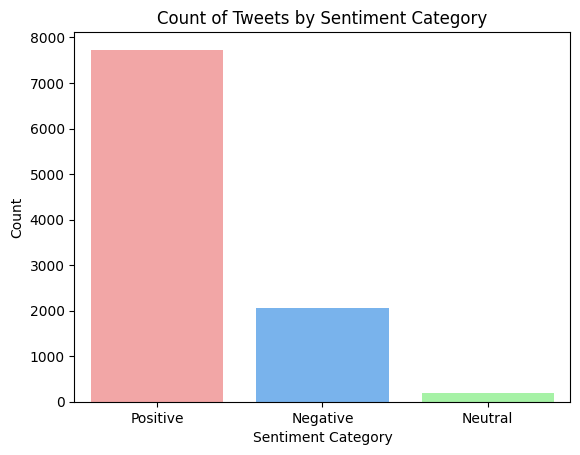

In [35]:
colors = ['#ff9999','#66b3ff','#99ff99']
sns.countplot(x='Sentiment Category', data=df, palette=colors)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()

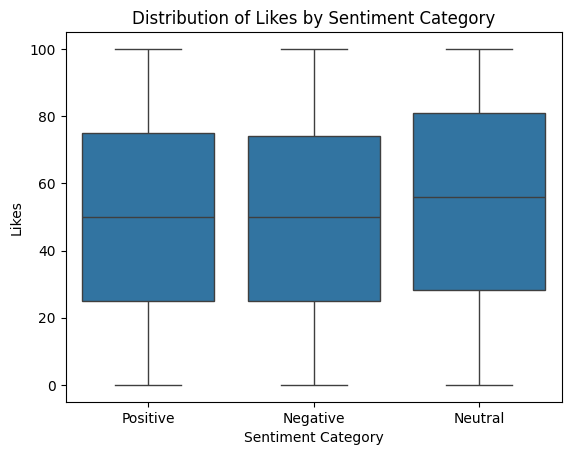

In [36]:
sns.boxplot(x='Sentiment Category', y='Likes', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.title('Distribution of Likes by Sentiment Category')
plt.show()

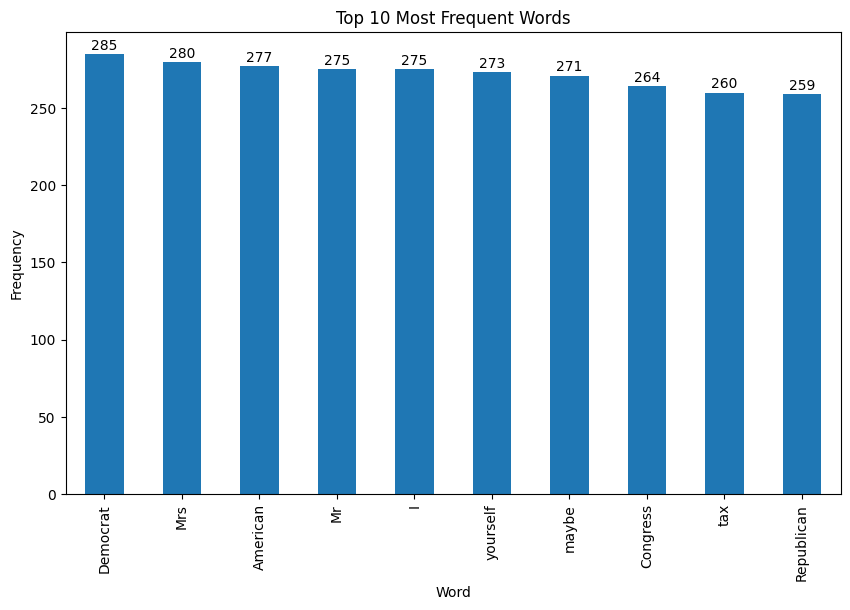

In [37]:
all_text = ' '.join(df['Text'])

# Split the text into individual words
words = all_text.split()

# Calculate the frequency of each word
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(10).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
for i, v in enumerate(word_counts.head(10)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

## Generate Word Cloud

Create a word cloud to visualize the most frequent words in the tweets.


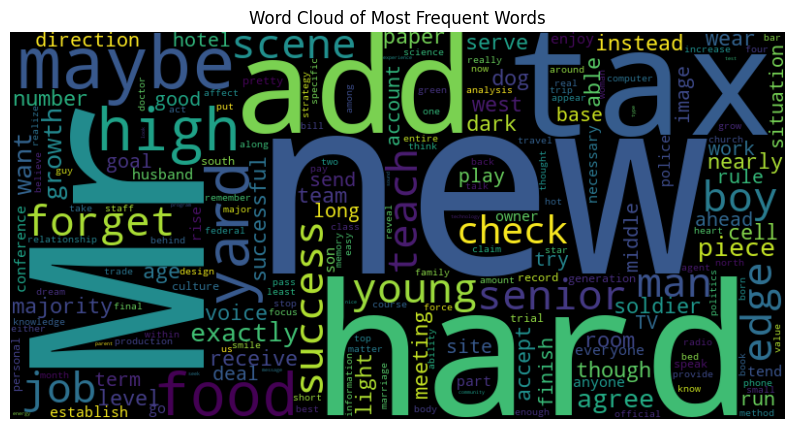

In [38]:
all_text = ' '.join(df['Text'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [39]:
print(df['Sentiment'])

Timestamp
2023-01-30 11:00:51    0.115714
2023-01-02 22:45:58    0.308333
2023-01-18 11:25:19    0.220000
2023-04-10 22:06:29    0.054762
2023-01-24 07:12:21    0.033333
                         ...   
2023-01-15 11:46:20   -0.150000
2023-05-06 00:46:54    0.046667
2023-02-27 14:55:08   -0.090476
2023-01-09 16:09:35    0.253770
2023-04-19 01:35:56    0.251667
Name: Sentiment, Length: 10000, dtype: float64


## Binarize Sentiments

Convert sentiment scores into binary labels for classification (positive if greater than 0.5, negative otherwise).


In [40]:
df['Sentiment Binary']=(df['Sentiment']>0.5).astype(int)
print(df[df['Sentiment Binary']==1])

                     Tweet_ID          Username  \
Timestamp                                         
2023-03-15 01:26:17        43          sherry41   
2023-02-16 08:23:26       277         lopezpaul   
2023-04-21 18:36:52       296        phenderson   
2023-03-07 02:11:17       346        aprilbrown   
2023-04-10 05:59:52       553       sharonolson   
2023-01-22 03:01:24      1033   villarrealheidi   
2023-03-03 05:12:58      1344            ncraig   
2023-02-01 06:41:15      1423     raymondsteven   
2023-02-23 08:48:42      1753     timothymartin   
2023-01-18 15:44:40      2387           gspears   
2023-02-21 03:07:52      2426       jenniferlee   
2023-04-20 16:46:43      2593  richardsonjustin   
2023-02-25 19:50:20      2742        dawntorres   
2023-02-09 15:13:16      2938         kdelacruz   
2023-03-01 17:20:59      3221           joann06   
2023-02-22 17:48:16      3727          kvasquez   
2023-02-09 03:55:14      3906       ashleyroman   
2023-01-04 12:57:24      3958  

In [43]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Filter out rows with missing sentiment values
dataset = df[df['Sentiment'] != -1]

# Drop rows with missing text values
dataset.dropna(subset=['Text'], inplace=True)
dataset.dropna(subset=['Sentiment'], inplace=True)

# Extract text and sentiment columns
texts = dataset['Text'].tolist()
sentiments = dataset['Sentiment Binary'].tolist()

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert text data to sequences and pad sequences
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, np.array(sentiments), test_size=0.8, random_state=42)

# Verify shapes of the splits
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')


Training data shape: (2000, 48)
Testing data shape: (8000, 48)
Training labels shape: (2000,)
Testing labels shape: (8000,)
